<a href="https://colab.research.google.com/github/ldgk2712/Portfolio_Project/blob/main/Ph%C3%A2n_T%C3%ADch_%C4%90i%E1%BB%83m_Thi_THPTQG_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Load Data**

In [ ]:
# import 1 số thư viện quan trọng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Connect with GG Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_20_21 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/diem_thi_2020_2021.csv")
df_22 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/diem_thi_thpt_2022.csv")
df_23 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/diem_thi_thpt_2023.csv")
df_24 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/diem_thi_thpt_2024.csv")

<ipython-input-3-8bc96d1407d8>:1: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_20_21 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/diem_thi_2020_2021.csv")


# **2. Data Cleaning**

## 2.1 Data Type, Null Values, Duplicate Values

In [ ]:
df_22.sort_values(by='sbd', ascending=True).head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25


In [ ]:
df_23.sort_values(by='sbd', ascending=True).head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.5,9.2,NaN,NaN,NaN,6.75,6.0,9.0,N1
1,1000002,7.2,8.5,9.2,NaN,NaN,NaN,8.75,6.5,8.5,N1


In [ ]:
df_24.sort_values(by='sbd', ascending=True).head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.0,8.0,N1


In [ ]:
df_20_21.sort_values(by='SBD', ascending=True).head(2)

,SBD,Tên,Ngày Sinh,Giới tính,Toán,Văn,Lý,Hoá,Sinh,Lịch Sử,Địa Lý,GDCD,Ngoại Ngữ,Year,code,province
173247,1000001,NaN,NaN,NaN,7.0,6.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,2020,1,Hà Nội
870577,1000001,NaN,NaN,NaN,2.2,3.5,NaN,NaN,NaN,2.5,5.5,NaN,NaN,2021,1,Hà Nội


### **Transform Tables**

In [ ]:
df_20_21['ma_ngoai_ngu'] = 'none'

df_20_21 = df_20_21[['SBD','Toán','Văn','Ngoại Ngữ','Lý','Hoá','Sinh','Lịch Sử','Địa Lý','GDCD','ma_ngoai_ngu','Year']]

df_20_21.columns = ['sbd','toan','ngu_van','ngoai_ngu','vat_li','hoa_hoc','sinh_hoc','lich_su','dia_li','gdcd','ma_ngoai_ngu','year']

In [ ]:
df_20_21.sort_values(by='sbd', ascending=True).head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year
173247,1000001,7.0,6.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,none,2020
870577,1000001,2.2,3.5,NaN,NaN,NaN,NaN,2.5,5.5,NaN,none,2021


In [ ]:
df_22['ma_ngoai_ngu'] = 'none'
df_22['year'] = '2022'
df_23['year'] = '2023'
df_24['year'] = '2024'

In [ ]:
df_24.head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1,2024
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.0,8.0,N1,2024


### **Concat All Tables**

In [ ]:
df_data_all = (pd.concat([df_20_21, df_22, df_23, df_24], ignore_index=True))

In [ ]:
df_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936983 entries, 0 to 4936982
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sbd           int64  
 1   toan          float64
 2   ngu_van       float64
 3   ngoai_ngu     float64
 4   vat_li        float64
 5   hoa_hoc       float64
 6   sinh_hoc      float64
 7   lich_su       float64
 8   dia_li        float64
 9   gdcd          float64
 10  ma_ngoai_ngu  object 
 11  year          object 
dtypes: float64(9), int64(1), object(2)
memory usage: 452.0+ MB


### **Create Table Of Province**

In [ ]:
df_ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/diem_thi_2020_2021.csv")

<ipython-input-14-c113ebd4c2ae>:1: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/diem_thi_2020_2021.csv")


In [ ]:
# tạo mã tỉnh và tên tỉnh
df_code = df_[['code','province']].drop_duplicates()

In [ ]:
df_code['code'] = df_code['code'].astype(str)

In [ ]:
df_code.sort_values(by='code', ascending=True).head(5)

,code,province
20857,1,Hà Nội
348763,10,Lạng Sơn
337052,11,Bắc Kạn
41516,12,Thái Nguyên
4830,13,Yên Bái


In [ ]:
# Map thêm tỉnh vào data

# tạo function code province
def province_code(x):
  if len(str(x)) == 7:
    return str(x)[0]
  return str(x)[:2]

In [ ]:
df_data_all['province_code'] = df_data_all['sbd'].apply(province_code) # tách code từ sbd thí sinh

In [ ]:
df_data_all.head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year,province_code
0,18014547,6.4,6.75,4.2,NaN,NaN,NaN,4.75,7.00,6.50,none,2020,18
1,18014530,7.6,6.00,2.8,NaN,NaN,NaN,3.75,7.75,7.75,none,2020,18


In [ ]:
df_data_map = pd.merge(df_data_all, df_code, left_on='province_code', right_on='code', how='left')

In [ ]:
df_data_map.count()

,0
sbd,4936983
toan,4875444
ngu_van,4870458
ngoai_ngu,4304415
vat_li,1636638
hoa_hoc,1644189
sinh_hoc,1620819
lich_su,3252369
dia_li,3227958
gdcd,2718405


In [ ]:
df_data_map[df_data_map['code']=='31'].head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year,province_code,code,province
191053,31000020,6.4,4.75,2.2,3.75,4.25,4.25,NaN,NaN,NaN,none,2020,31,31,Quảng Bình
191054,31000023,4.6,3.00,NaN,NaN,NaN,NaN,2.5,NaN,NaN,none,2020,31,31,Quảng Bình


# **3. Analyze**

## **3.1 Overview**

In [ ]:
df_data_map['year'] = df_data_map['year'].astype(str)

In [ ]:
df_data_map['year'].unique()

array(['2020', '2021', '2022', '2023', '2024'], dtype=object)

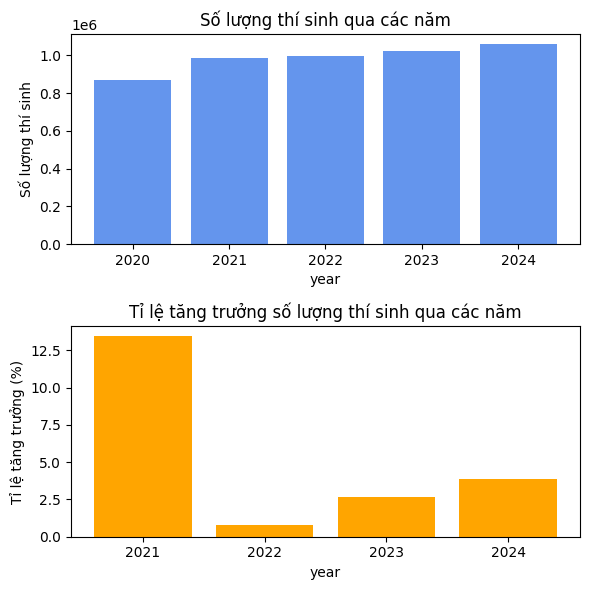

In [ ]:
data = df_data_map

# Tính toán số lượng thí sinh mỗi năm
student_per_year = data['year'].value_counts().sort_index()

# Tính tỉ lệ tăng trưởng
growth_rate = student_per_year.pct_change() * 100

# Tạo DataFrame để hiện thị kết quả
students_growth_df = pd.DataFrame({
    'Số lượng thí sinh': student_per_year,
    'Tỉ lệ tăng trưởng (%)': growth_rate
}).reset_index().rename(columns={'index': 'year'})

# Vẽ biểu đồ
fig, ax = plt.subplots(2, 1, figsize = (6,6))

# Vẽ số lượng thí sinh
ax[0].bar(students_growth_df['year'], students_growth_df['Số lượng thí sinh'], color = 'cornflowerblue')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Số lượng thí sinh')
ax[0].set_title('Số lượng thí sinh qua các năm')
ax[0].grid(False)

# Vẽ tỉ lệ tăng trưởng
ax[1].bar(students_growth_df['year'], students_growth_df['Tỉ lệ tăng trưởng (%)'], color = 'orange')
ax[1].set_xlabel('year')
ax[1].set_ylabel('Tỉ lệ tăng trưởng (%)')
ax[1].set_title('Tỉ lệ tăng trưởng số lượng thí sinh qua các năm')
ax[1].grid(False)

plt.tight_layout()
plt.show()

### **Score Distribution Over Year**

In [ ]:
from scipy.interpolate import make_interp_spline

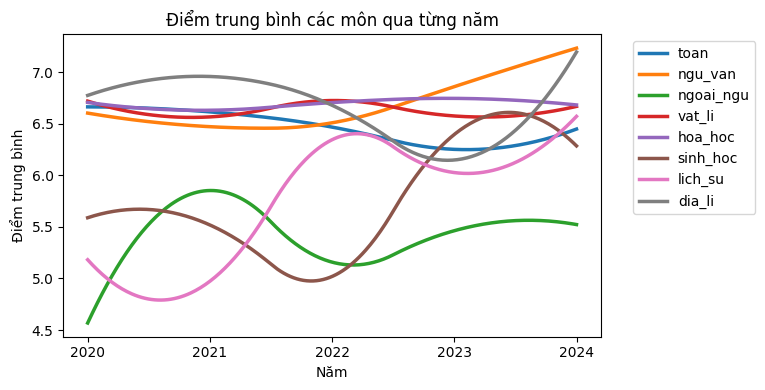

In [ ]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

x_year = [2020, 2021, 2022, 2023, 2024]

# Định nghĩa các môn học và tiêu đề
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li']
titles = ['Toán', 'Ngữ văn', 'Ngoại ngữ', 'Lý', 'Hóa', 'Sinh', 'Sử', 'Địa']

# Tính toán điểm tb các môn qua từng năm
mean_scores_by_year = data.groupby(['year'])[subjects].mean().reset_index()

# Vẽ biểu đồ đường cho từng môn với các đường kẻ mềm mại hơn
plt.figure(figsize=(8, 4))

for subject in subjects:
    x = mean_scores_by_year['year']
    y = mean_scores_by_year[subject]

    # Tạo các điểm x mới để làm mịn đường
    x_new = np.linspace(x.min(), x.max(), 300)

    # Tạo spline để làm mịn đường
    spl = make_interp_spline(x, y, k=2)
    y_smooth = spl(x_new)

    # Vẽ đường cho môn học hiện tại
    plt.plot(x_new, y_smooth, label = subject, lw = 2.5, alpha = 1)

plt.title("Điểm trung bình các môn qua từng năm")
plt.xlabel("Năm")
plt.ylabel("Điểm trung bình")
plt.xticks(x_year)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(False)
plt.tight_layout()
plt.show()

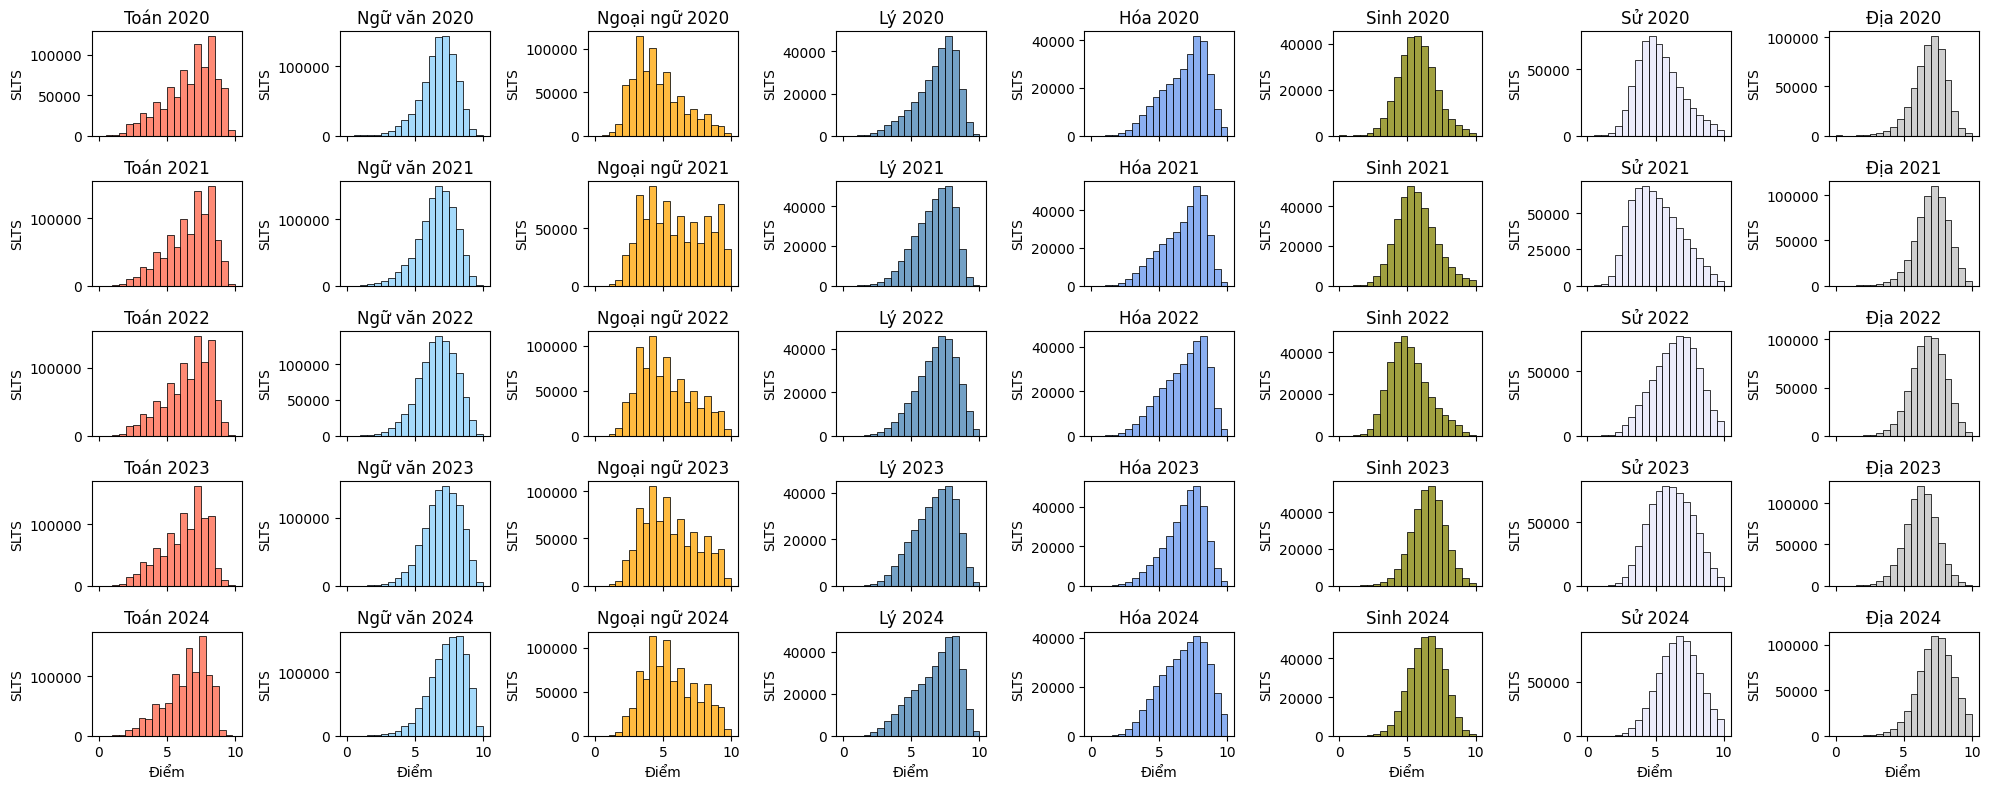

In [ ]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

# Tạo histogram cho điểm 'toan','ngu_van','ngoai_ngu' cho 5 năm gần đây
fig, axes = plt.subplots(5, 8, figsize=(20,8), sharex=True)

# Định nghĩa các môn học và tiêu đề
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li']
titles = ['Toán', 'Ngữ văn', 'Ngoại ngữ', 'Lý', 'Hóa', 'Sinh', 'Sử', 'Địa']
colors = ['tomato', 'lightskyblue', 'orange', 'steelblue', 'cornflowerblue', 'olive', 'lavender', 'silver']

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và từng môn học
for i, year in enumerate(recent_years_sorted):
  for j, (subject, color) in enumerate(zip(subjects, colors)):
    sns.histplot(recent_years[recent_years['year'] == year][subject], bins=20, kde=False, ax=axes[i,j], edgecolor='black', color=color)
    axes[i,j].set_title(f'{titles[j]} {year}')
    axes[i,j].set_xlabel('Điểm')
    axes[i,j].set_ylabel('SLTS')

plt.tight_layout()
plt.show()

### **Subject**

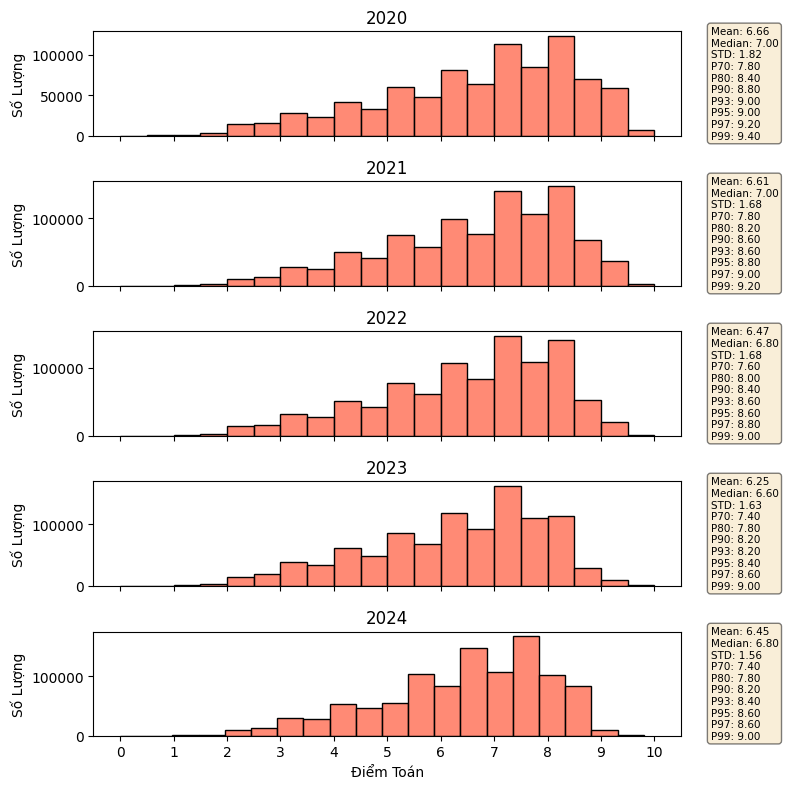

In [ ]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'toan' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['toan'], bins=20, kde=False, ax=axes[i], edgecolor='black', color='tomato')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm Toán')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['toan']
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

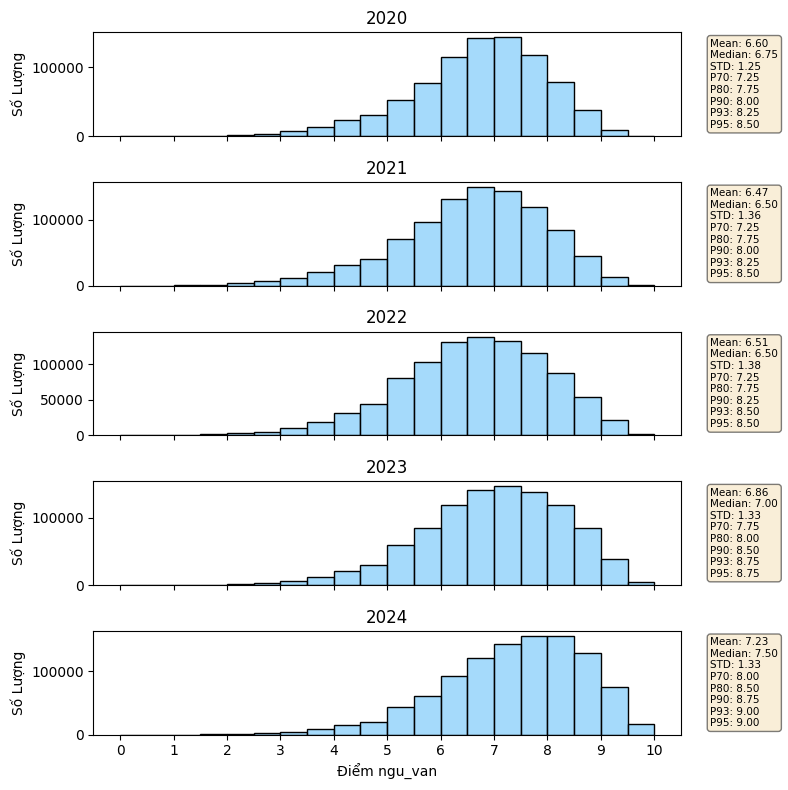

In [ ]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'ngu_van'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'ngu_van' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='lightskyblue')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

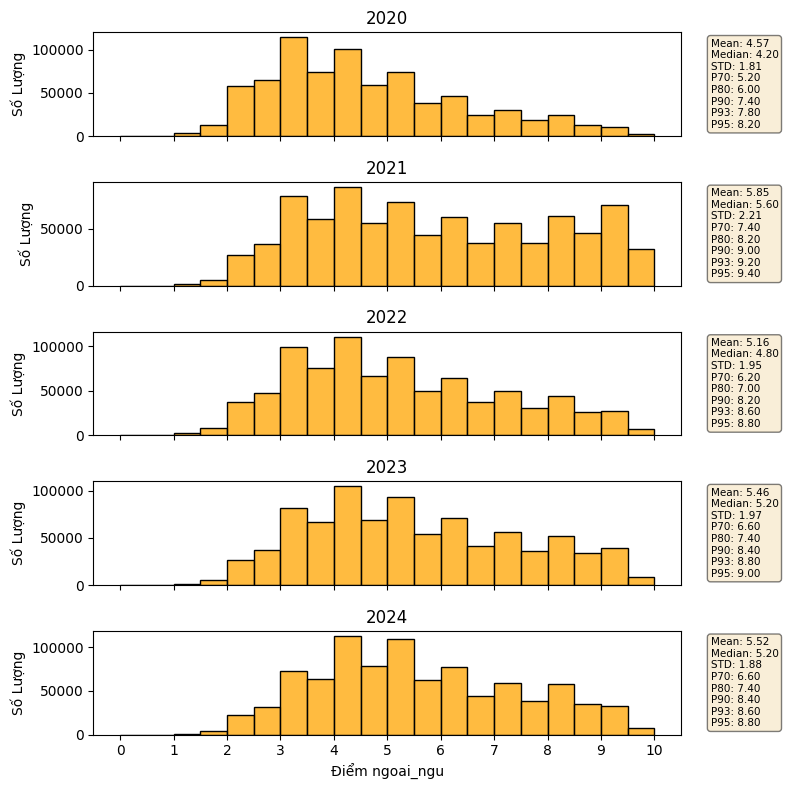

In [ ]:
 data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'ngoai_ngu'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm f{sub} cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='orange')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

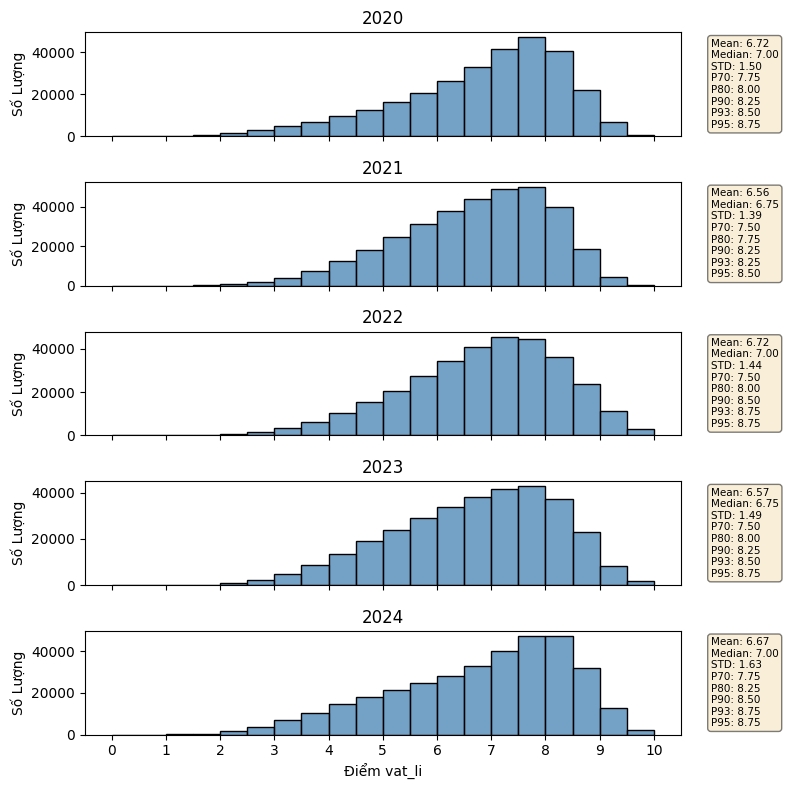

In [ ]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'vat_li'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'ngu_van' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='steelblue')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

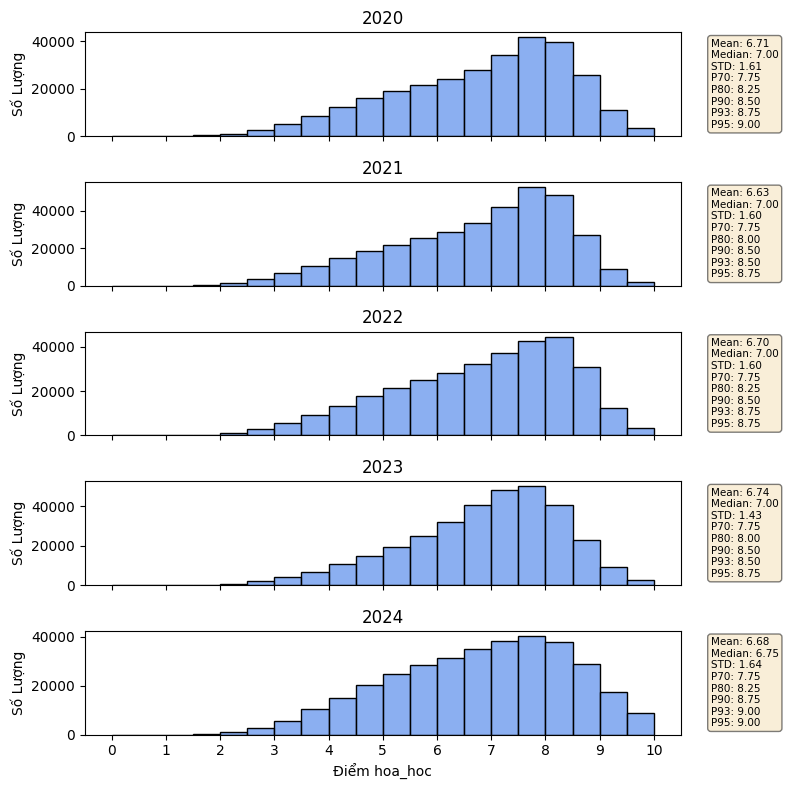

In [ ]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'hoa_hoc'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'ngu_van' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='cornflowerblue')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

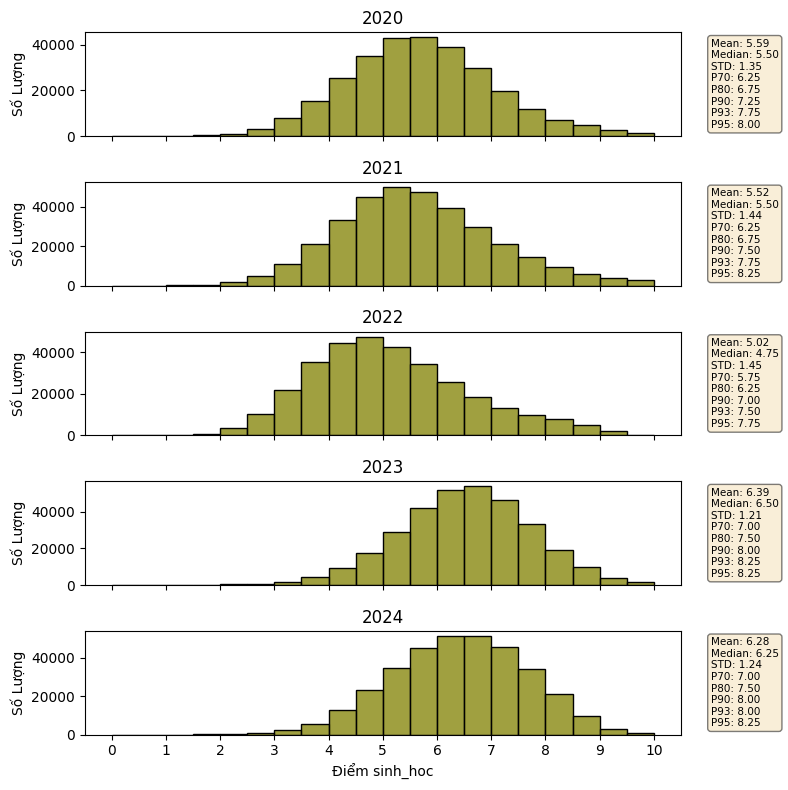

In [ ]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'sinh_hoc'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'ngu_van' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='olive')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

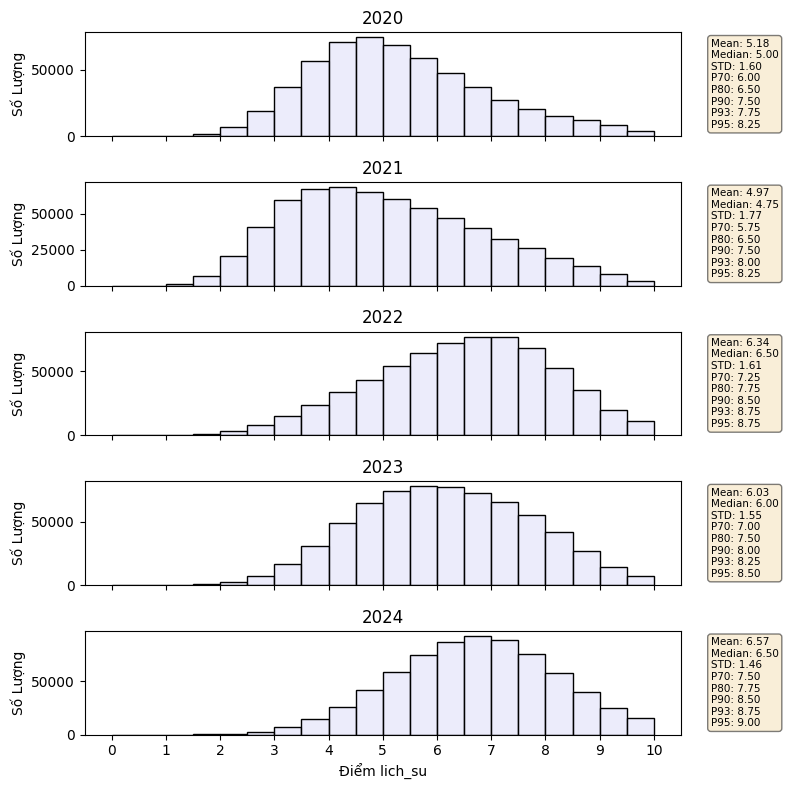

In [ ]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'lich_su'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'ngu_van' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='lavender')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

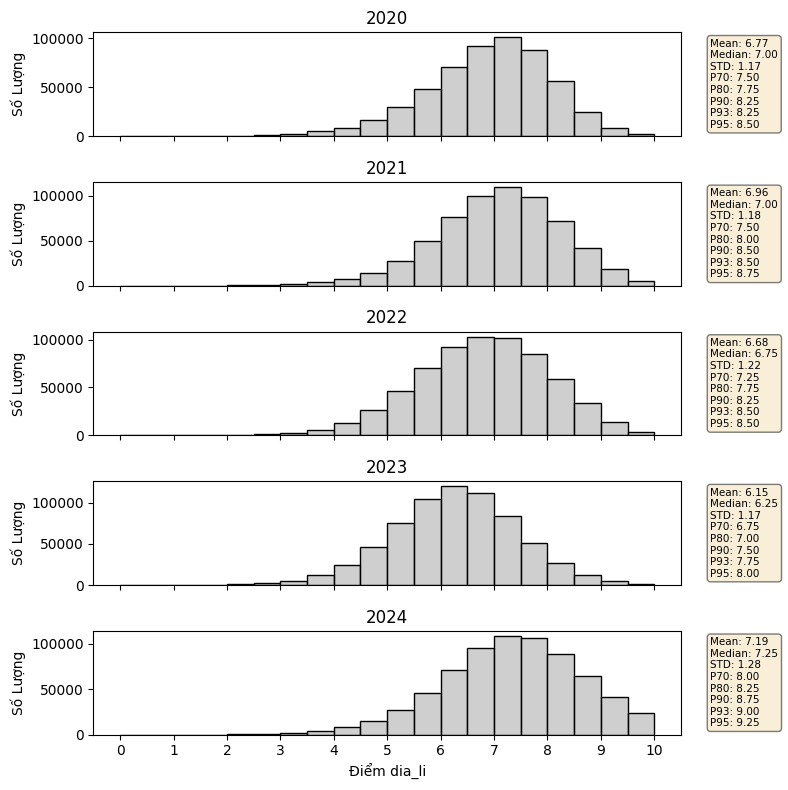

In [ ]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'dia_li'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'ngu_van' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='silver')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

#### Compare with previous years

In [ ]:
sampled_data = df_data_map.sample(frac=0.3, random_state=1)

In [ ]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1481095 entries, 2201011 to 3906872
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   sbd            1481095 non-null  int64  
 1   toan           1462610 non-null  float64
 2   ngu_van        1461251 non-null  float64
 3   ngoai_ngu      1291877 non-null  float64
 4   vat_li         492325 non-null   float64
 5   hoa_hoc        494642 non-null   float64
 6   sinh_hoc       487729 non-null   float64
 7   lich_su        974308 non-null   float64
 8   dia_li         966986 non-null   float64
 9   gdcd           814805 non-null   float64
 10  ma_ngoai_ngu   1394076 non-null  object 
 11  year           1481095 non-null  int64  
 12  province_code  1481095 non-null  object 
 13  code           1481095 non-null  object 
 14  province       1481095 non-null  object 
dtypes: float64(9), int64(2), object(4)
memory usage: 180.8+ MB


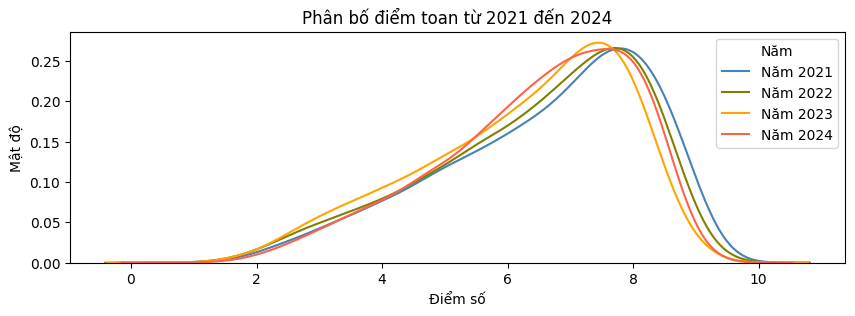

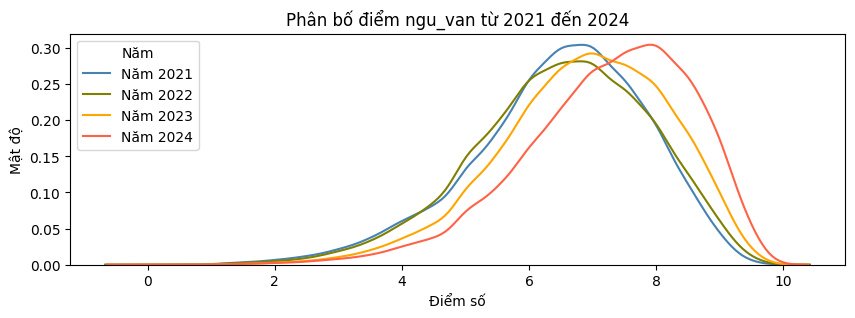

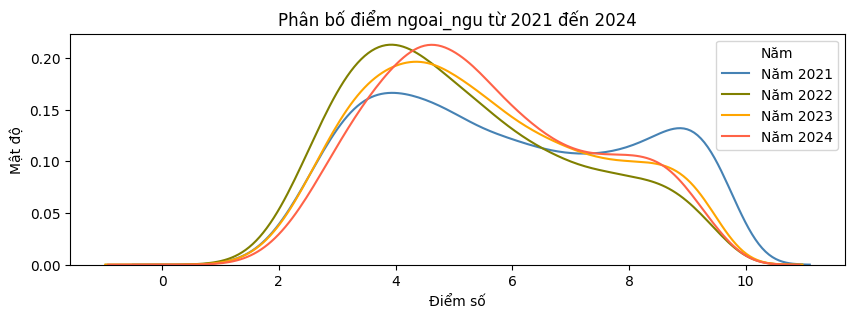

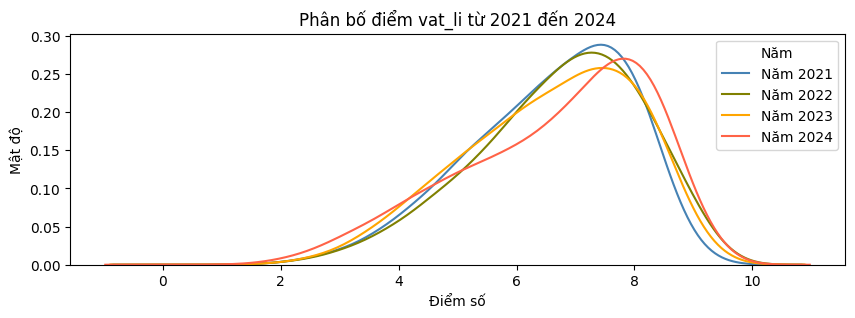

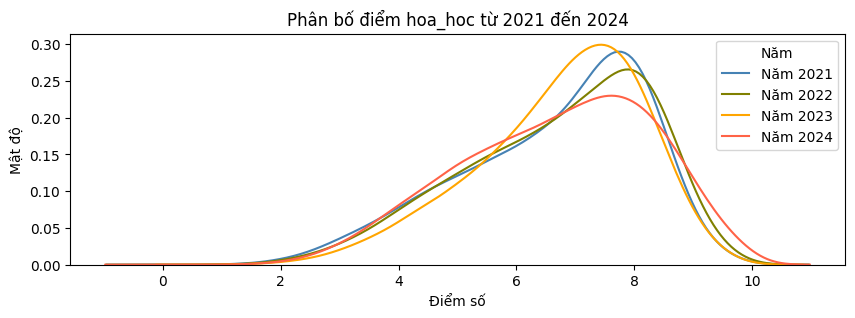

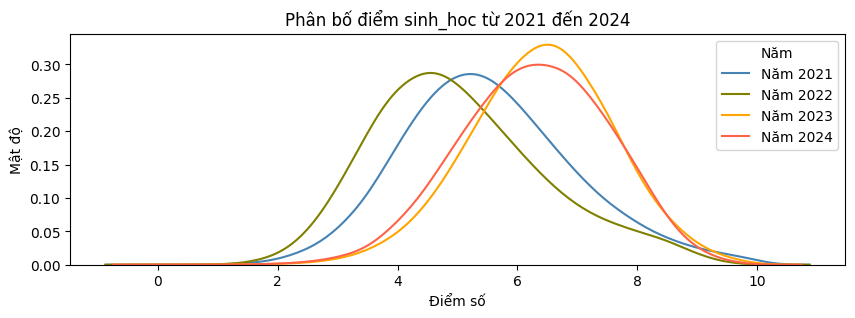

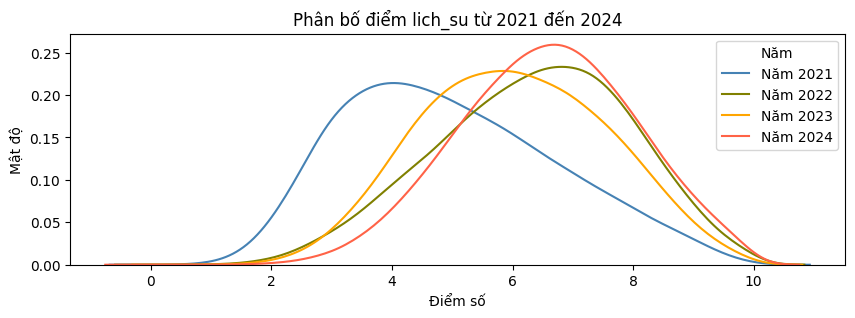

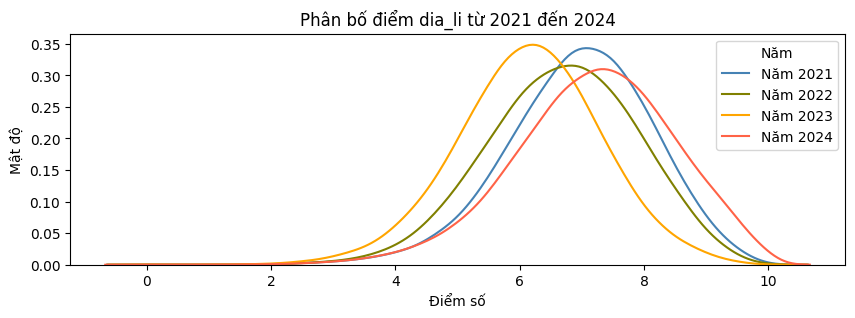

In [ ]:
# Lọc dữ liệu từ 2021 đến 2024
df_filtered = sampled_data[sampled_data['year'].isin([2021, 2022, 2023, 2024])]

# Các môn học cần phân tích
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li']
colors = ['steelblue', 'olive', 'orange', 'tomato']

# Vẽ histogram cho từng môn học
for subject in subjects:
  plt.figure(figsize=(10, 3))
  for year, color in zip([2021, 2022, 2023, 2024], colors):
    data = df_filtered[df_filtered['year'] == year][subject].dropna()
    sns.kdeplot(data, label = f'Năm {year}', color=color, bw_adjust=2)
  plt.title(f'Phân bố điểm {subject} từ 2021 đến 2024')
  plt.xlabel('Điểm số')
  plt.ylabel('Mật độ')
  plt.legend(title='Năm')
  plt.grid(False)
  plt.show()

## **3.2 Group Distribution**

<ipython-input-41-0723b5898bcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['A'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['hoa_hoc']
<ipython-input-41-0723b5898bcc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['A1'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['ngoai_ngu']
<ipython-input-41-0723b5898bcc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

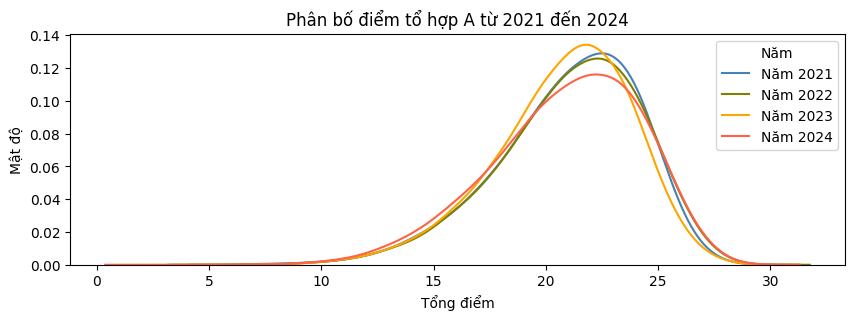

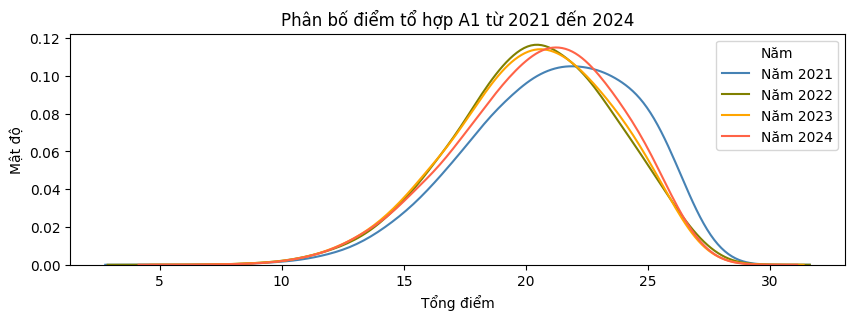

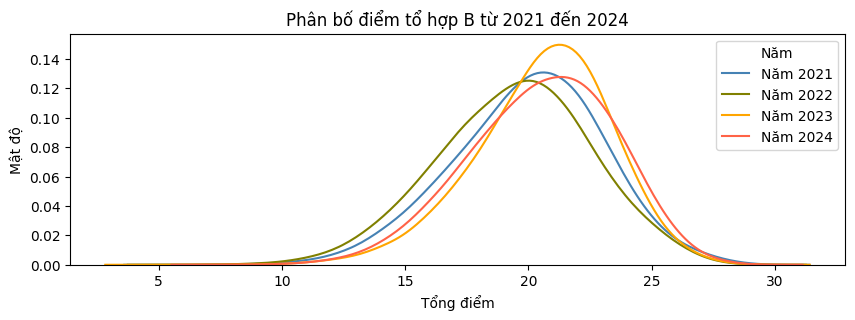

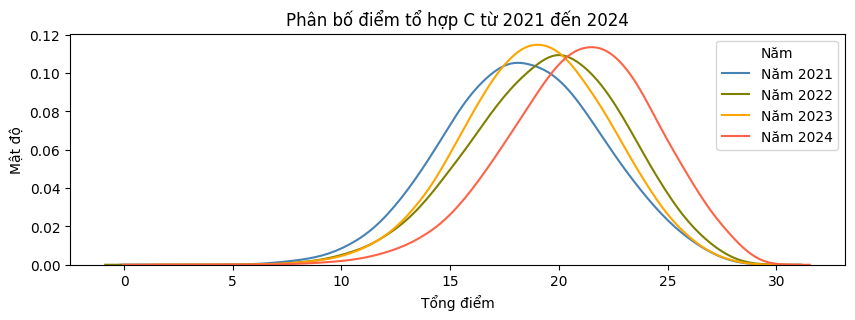

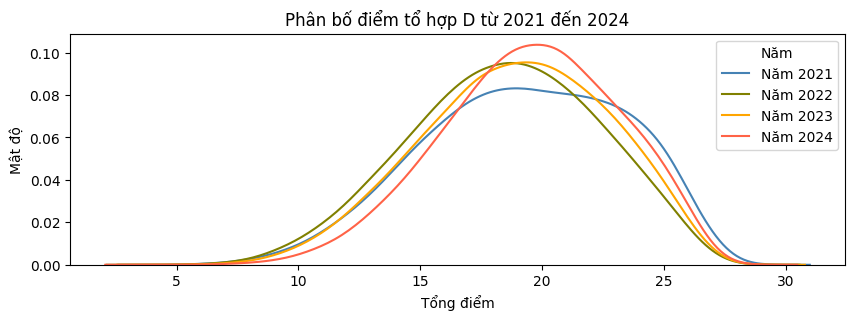

In [ ]:
# Tạo các cột tổng điểm cho từng tổ hợp môn
df_filtered['A'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['hoa_hoc']
df_filtered['A1'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['ngoai_ngu']
df_filtered['B'] = df_filtered['toan'] + df_filtered['hoa_hoc'] + df_filtered['sinh_hoc']
df_filtered['C'] = df_filtered['ngu_van'] + df_filtered['lich_su'] + df_filtered['dia_li']
df_filtered['D'] = df_filtered['toan'] + df_filtered['ngoai_ngu'] + df_filtered['ngu_van']

# Các tổ hợp môn cần phân tích
combinations = ['A', 'A1', 'B', 'C', 'D']

# Thiết lập các cài đặt cho biểu đồ
colors = ['steelblue', 'olive', 'orange', 'tomato']

# Vẽ histogram cho từng tổ hợp môn
for combo in combinations:
  plt.figure(figsize=(10, 3))
  for year, color in zip([2021, 2022, 2023, 2024],colors):
    data = df_filtered[df_filtered['year'] == year][combo].dropna()
    sns.kdeplot(data, label = f'Năm {year}', color=color, bw_adjust=2)
  plt.title(f'Phân bố điểm tổ hợp {combo} từ 2021 đến 2024')
  plt.xlabel('Tổng điểm')
  plt.ylabel('Mật độ')
  plt.legend(title='Năm')
  plt.grid(False)
  plt.show()

### **Group A**

In [ ]:
# Tạo các cột tổng điểm cho từng tổ hợp môn
df_data_map['A'] = df_data_map['toan'] + df_data_map['vat_li'] + df_data_map['hoa_hoc']
df_data_map['A1'] = df_data_map['toan'] + df_data_map['vat_li'] + df_data_map['ngoai_ngu']
df_data_map['B'] = df_data_map['toan'] + df_data_map['hoa_hoc'] + df_data_map['sinh_hoc']
df_data_map['C'] = df_data_map['ngu_van'] + df_data_map['lich_su'] + df_data_map['dia_li']
df_data_map['D'] = df_data_map['toan'] + df_data_map['ngoai_ngu'] + df_data_map['ngu_van']

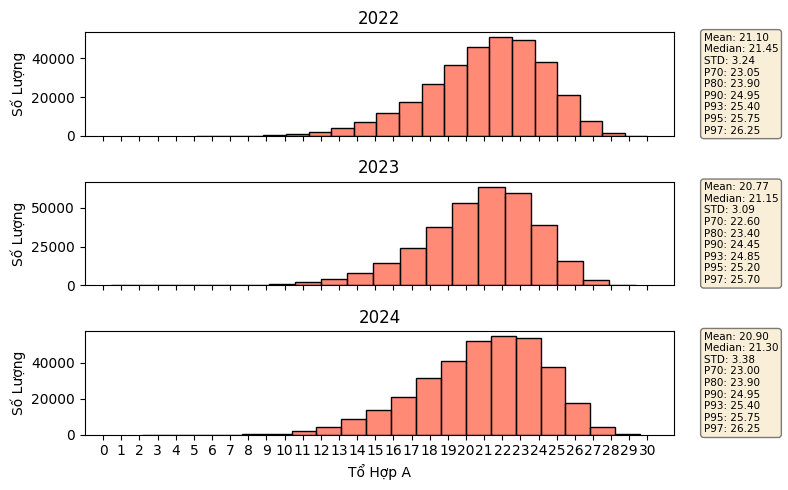

In [ ]:
data = df_data_map

sub = 'A'

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin([2022, 2023, 2024])]

score = list(range(0,31,1))

# Tạo histogram cho to hop 'f{sub}' cho 3 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='tomato')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

<ipython-input-44-a84802c4b471>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['bins'] = pd.cut(df_2023[combo], bins)
<ipython-input-44-a84802c4b471>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['bins'] = pd.cut(df_2024[combo], bins)


Sự chênh lệch trung bình số thí sinh: 768.4736842105267
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (-4847.761081278546, 6384.708449699599)


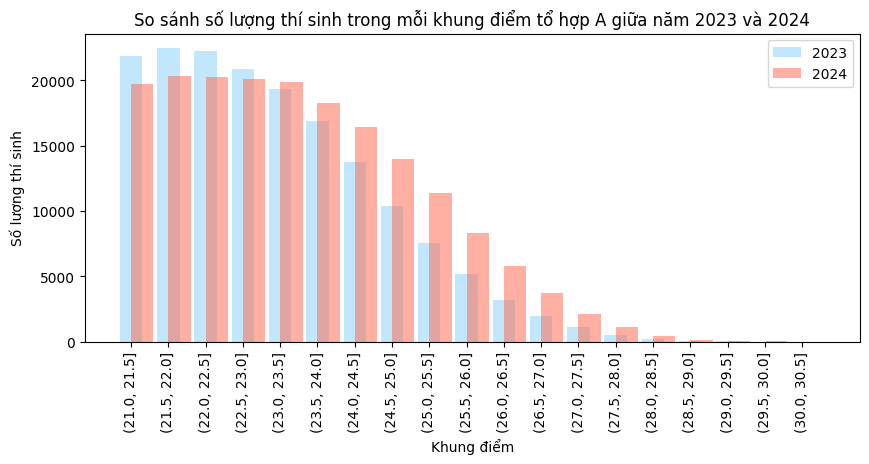

In [ ]:
# Ước lượng
from scipy import stats

# Lựa chọn tổ hợp môn cần phân tích, VD: A
combo = 'A'

# Chia khung điểm từ 20 đến 30 điểm, mỗi khoảng 1 điểm
bins = np.arange(21, 31, 0.5)

# Lọc dữ liệu cho các năm 2023 và 2024
df_2023 = df_data_map[df_data_map['year'] == 2023]
df_2024 = df_data_map[df_data_map['year'] == 2024]

# Tạo bảng đếm số lượng thí sinh trong mỗi khung điểm cho từng năm
df_2023['bins'] = pd.cut(df_2023[combo], bins)
df_2024['bins'] = pd.cut(df_2024[combo], bins)

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

# Tính toán sự chênh lệch trung bình số thí sinh và khoảng tin cậy
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

# Hiển thị kết quả
print(f"Sự chênh lệch trung bình số thí sinh: {mean_diff}")
print(f"Khoảng tin cậy 95% cho sự chênh lệch trung bình: {confidence_interval}")

# Vẽ biểu đồ so sánh số lượng học sinh trong mỗi khung điểm cho 2 năm
plt.figure(figsize = (10,4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align='center', alpha=0.5, color = 'lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align='edge', alpha=0.5, color = 'tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### **Group A1**

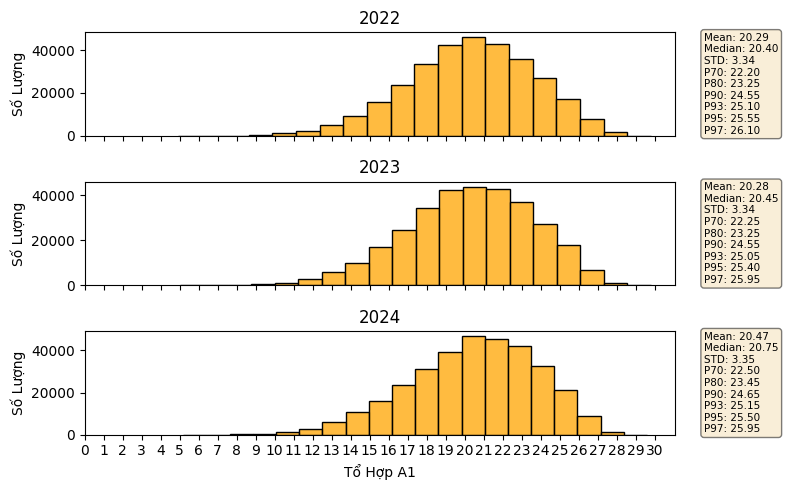

In [ ]:
data = df_data_map

sub = 'A1'

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin([2022, 2023, 2024])]

score = list(range(0,31,1))

# Tạo histogram cho to hop 'f{sub}' cho 3 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='orange')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

<ipython-input-46-29ff03ea6c04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['bins'] = pd.cut(df_2023[combo], bins)
<ipython-input-46-29ff03ea6c04>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['bins'] = pd.cut(df_2024[combo], bins)


Sự chênh lệch trung bình số thí sinh: 911.3684210526317
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (-3678.928455074398, 5501.665297179661)


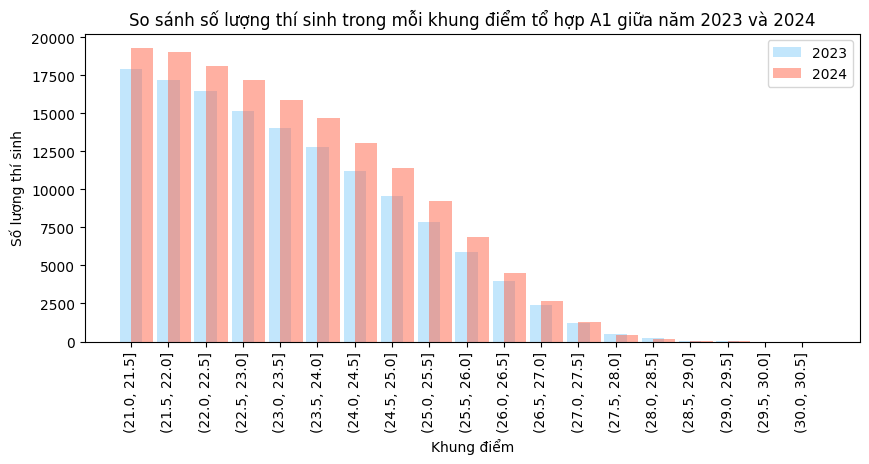

In [ ]:
# Lựa chọn tổ hợp môn cần phân tích
combo = 'A1'

# Tạo bảng đếm số lượng thí sinh trong mỗi khung điểm cho từng năm
df_2023['bins'] = pd.cut(df_2023[combo], bins)
df_2024['bins'] = pd.cut(df_2024[combo], bins)

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

# Tính toán sự chênh lệch trung bình số thí sinh và khoảng tin cậy
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

# Hiển thị kết quả
print(f"Sự chênh lệch trung bình số thí sinh: {mean_diff}")
print(f"Khoảng tin cậy 95% cho sự chênh lệch trung bình: {confidence_interval}")

# Vẽ biểu đồ so sánh số lượng học sinh trong mỗi khung điểm cho 2 năm
plt.figure(figsize = (10,4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align='center', alpha=0.5, color = 'lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align='edge', alpha=0.5, color = 'tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### **Group B**

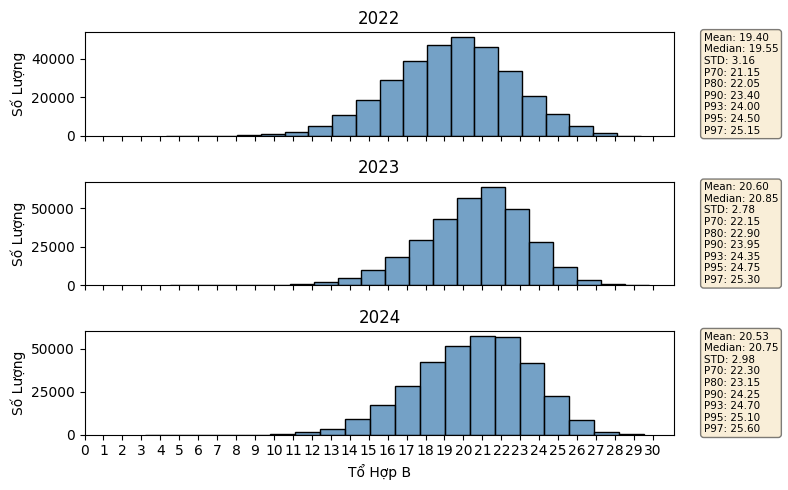

In [ ]:
data = df_data_map

sub = 'B'

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin([2022, 2023, 2024])]

score = list(range(0,31,1))

# Tạo histogram cho to hop 'f{sub}' cho 3 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='steelblue')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

<ipython-input-48-87ac9107da69>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['bins'] = pd.cut(df_2023[combo], bins)
<ipython-input-48-87ac9107da69>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['bins'] = pd.cut(df_2024[combo], bins)


Sự chênh lệch trung bình số thí sinh: 228.26315789473756
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (-5558.543545538889, 6015.069861328364)


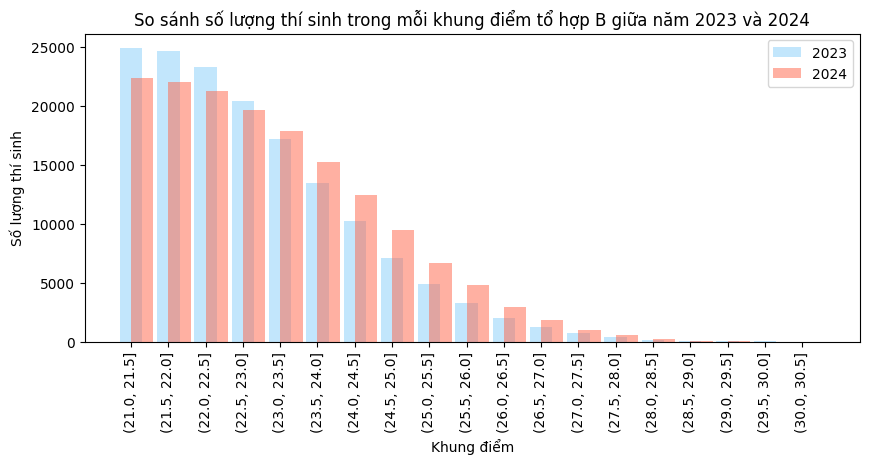

In [ ]:
# Lựa chọn tổ hợp môn cần phân tích
combo = 'B'

# Tạo bảng đếm số lượng thí sinh trong mỗi khung điểm cho từng năm
df_2023['bins'] = pd.cut(df_2023[combo], bins)
df_2024['bins'] = pd.cut(df_2024[combo], bins)

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

# Tính toán sự chênh lệch trung bình số thí sinh và khoảng tin cậy
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

# Hiển thị kết quả
print(f"Sự chênh lệch trung bình số thí sinh: {mean_diff}")
print(f"Khoảng tin cậy 95% cho sự chênh lệch trung bình: {confidence_interval}")

# Vẽ biểu đồ so sánh số lượng học sinh trong mỗi khung điểm cho 2 năm
plt.figure(figsize = (10,4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align='center', alpha=0.5, color = 'lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align='edge', alpha=0.5, color = 'tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### **Group C**

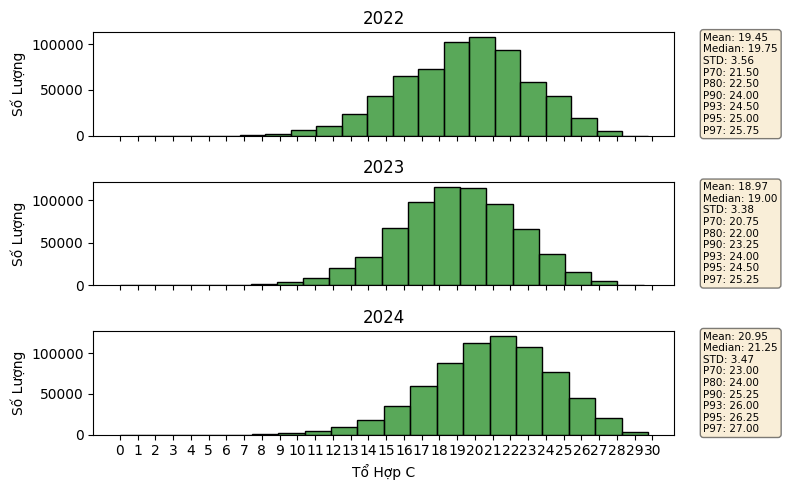

In [ ]:
data = df_data_map

sub = 'C'

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin([2022, 2023, 2024])]

score = list(range(0,31,1))

# Tạo histogram cho to hop 'f{sub}' cho 3 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='forestgreen')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

<ipython-input-50-95fa7e54c00d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['bins'] = pd.cut(df_2023[combo], bins)
<ipython-input-50-95fa7e54c00d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['bins'] = pd.cut(df_2024[combo], bins)


Sự chênh lệch trung bình số thí sinh: 8919.842105263158
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (523.9640932788097, 17315.720117247507)


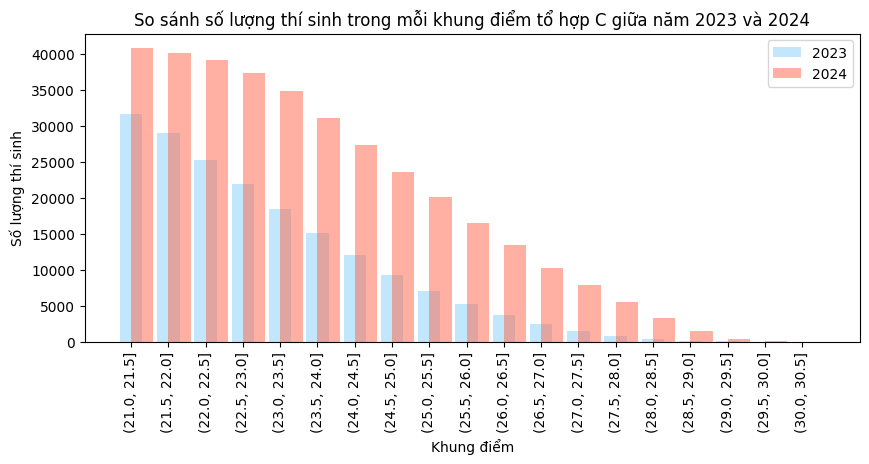

In [ ]:
# Lựa chọn tổ hợp môn cần phân tích
combo = 'C'

# Tạo bảng đếm số lượng thí sinh trong mỗi khung điểm cho từng năm
df_2023['bins'] = pd.cut(df_2023[combo], bins)
df_2024['bins'] = pd.cut(df_2024[combo], bins)

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

# Tính toán sự chênh lệch trung bình số thí sinh và khoảng tin cậy
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

# Hiển thị kết quả
print(f"Sự chênh lệch trung bình số thí sinh: {mean_diff}")
print(f"Khoảng tin cậy 95% cho sự chênh lệch trung bình: {confidence_interval}")

# Vẽ biểu đồ so sánh số lượng học sinh trong mỗi khung điểm cho 2 năm
plt.figure(figsize = (10,4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align='center', alpha=0.5, color = 'lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align='edge', alpha=0.5, color = 'tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### **Group D**

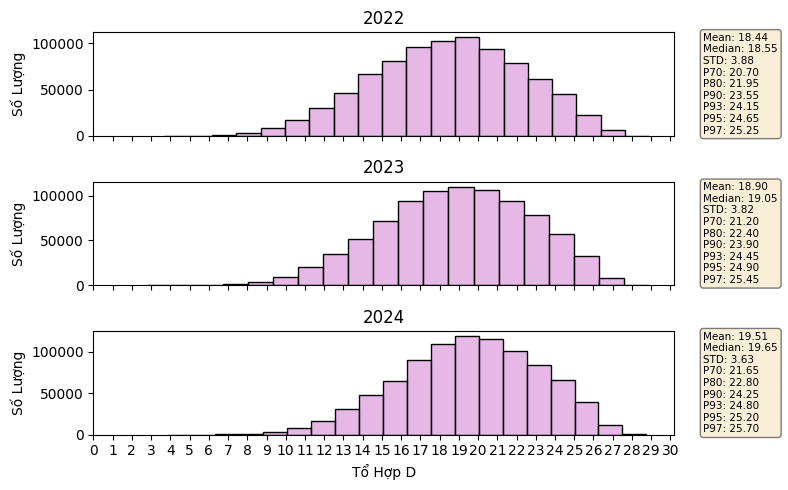

In [ ]:
data = df_data_map

sub = 'D'

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin([2022, 2023, 2024])]

score = list(range(0,31,1))

# Tạo histogram cho to hop 'f{sub}' cho 3 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='plum')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

<ipython-input-52-b6e18164566a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['bins'] = pd.cut(df_2023[combo], bins)
<ipython-input-52-b6e18164566a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['bins'] = pd.cut(df_2024[combo], bins)


Sự chênh lệch trung bình số thí sinh: 2597.78947368421
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (-7134.5510005606775, 12330.129947929097)


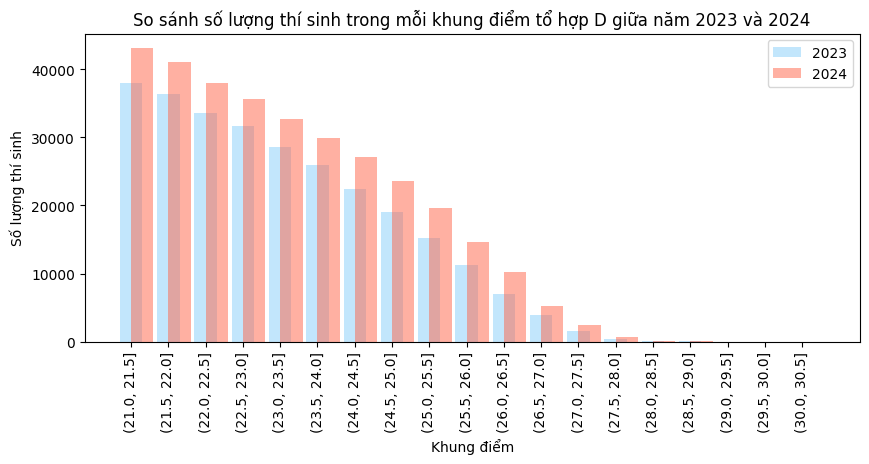

In [ ]:
# Lựa chọn tổ hợp môn cần phân tích
combo = 'D'

# Tạo bảng đếm số lượng thí sinh trong mỗi khung điểm cho từng năm
df_2023['bins'] = pd.cut(df_2023[combo], bins)
df_2024['bins'] = pd.cut(df_2024[combo], bins)

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

# Tính toán sự chênh lệch trung bình số thí sinh và khoảng tin cậy
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

# Hiển thị kết quả
print(f"Sự chênh lệch trung bình số thí sinh: {mean_diff}")
print(f"Khoảng tin cậy 95% cho sự chênh lệch trung bình: {confidence_interval}")

# Vẽ biểu đồ so sánh số lượng học sinh trong mỗi khung điểm cho 2 năm
plt.figure(figsize = (10,4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align='center', alpha=0.5, color = 'lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align='edge', alpha=0.5, color = 'tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### **Correlation**

In [ ]:
# Percentile
# Các tổ hợp môn cần phân tích
combinations = ['A', 'A1', 'B', 'C', 'D']

# Các percentile cần tính toán
percentiles = list(range(70, 101, 2))

# Tạo DataFrame để lưu kết quả
percentile_df = pd.DataFrame(index=percentiles)

# Tính toán các chỉ số percentile
for combo in combinations:
    for year in [2022, 2023, 2024]:
      data = df_data_map[df_data_map['year'] == year][combo].dropna()
      percentile_values = np.percentile(data, percentiles)
      percentile_df[f'{combo}_{year}'] = percentile_values

# Hiển thị kết quả dưới dạng bảng
percentile_df = percentile_df.T
percentile_df.index.name = 'Combination_Year'

In [ ]:
percentile_df

,70,72,74,76,78,80,82,84,86,88,90,92,94,96,98,100
Combination_Year,,,,,,,,,,,,,,,,
A_2022,23.05,23.20,23.35,23.55,23.70,23.90,24.05,24.25,24.45,24.70,24.95,25.25,25.55,26.00,26.55,30.00
A_2023,22.60,22.75,22.90,23.05,23.25,23.40,23.60,23.75,23.95,24.20,24.45,24.70,25.05,25.45,26.10,29.35
A_2024,23.00,23.15,23.35,23.50,23.70,23.90,24.05,24.25,24.50,24.70,24.95,25.25,25.60,26.00,26.60,29.60
A1_2022,22.20,22.40,22.60,22.80,23.00,23.25,23.45,23.70,24.00,24.25,24.55,24.90,25.30,25.80,26.45,29.80
A1_2023,22.25,22.45,22.60,22.80,23.05,23.25,23.50,23.70,24.00,24.25,24.55,24.85,25.20,25.65,26.25,29.80
A1_2024,22.50,22.65,22.85,23.05,23.25,23.45,23.70,23.90,24.15,24.40,24.65,24.95,25.30,25.70,26.25,29.60
B_2022,21.15,21.30,21.50,21.65,21.85,22.05,22.30,22.55,22.80,23.05,23.40,23.75,24.20,24.80,25.60,29.35
B_2023,22.15,22.30,22.45,22.60,22.75,22.90,23.10,23.25,23.45,23.70,23.95,24.20,24.55,25.00,25.70,29.80
B_2024,22.30,22.45,22.60,22.80,22.95,23.15,23.35,23.55,23.75,24.00,24.25,24.55,24.85,25.35,26.00,29.55


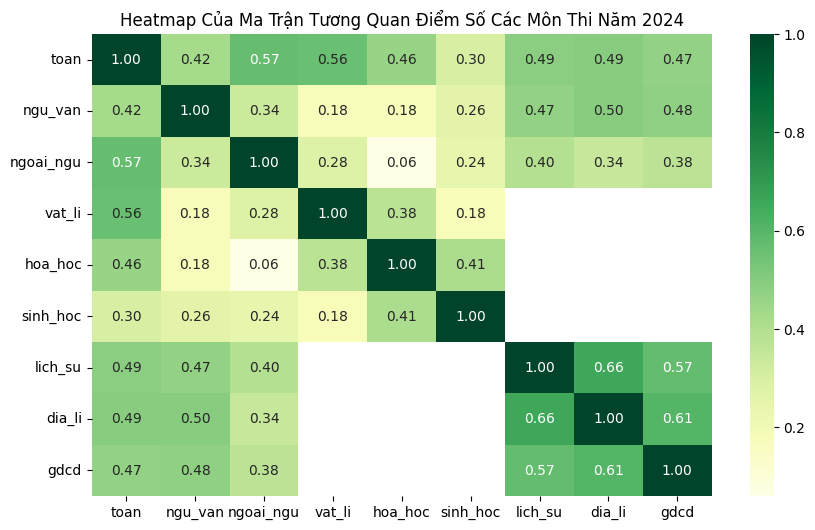

In [ ]:
# Lọc dữ liệu cho năm 2024
df_2024 = sampled_data[sampled_data['year'] == 2024]

# Chọn các cột điểm số cho các môn học
subjects_scores = df_2024[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']]

# Tính toán ma trận tương quan
correlation_matrix = subjects_scores.corr()

# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt='.2f')
plt.title('Heatmap Của Ma Trận Tương Quan Điểm Số Các Môn Thi Năm 2024')
plt.show()

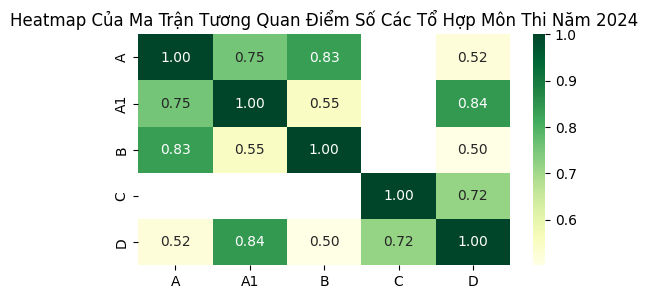

In [ ]:
sampled_data['A'] = sampled_data['toan'] + sampled_data['vat_li'] + sampled_data['hoa_hoc']
sampled_data['A1'] = sampled_data['toan'] + sampled_data['vat_li'] + sampled_data['ngoai_ngu']
sampled_data['B'] = sampled_data['toan'] + sampled_data['hoa_hoc'] + sampled_data['sinh_hoc']
sampled_data['C'] = sampled_data['ngu_van'] + sampled_data['dia_li'] + sampled_data['lich_su']
sampled_data['D'] = sampled_data['toan'] + sampled_data['ngu_van'] + sampled_data['ngoai_ngu']

# Lọc dữ liệu cho năm 2024
df_2024 = sampled_data[sampled_data['year'] == 2024]

# Chọn các cột điểm số cho các môn học
group_scores = df_2024[['A', 'A1', 'B', 'C', 'D']]

# Tính toán ma trận tương quan
correlation_matrix = group_scores.corr()

# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt='.2f')
plt.title('Heatmap Của Ma Trận Tương Quan Điểm Số Các Tổ Hợp Môn Thi Năm 2024')
plt.show()

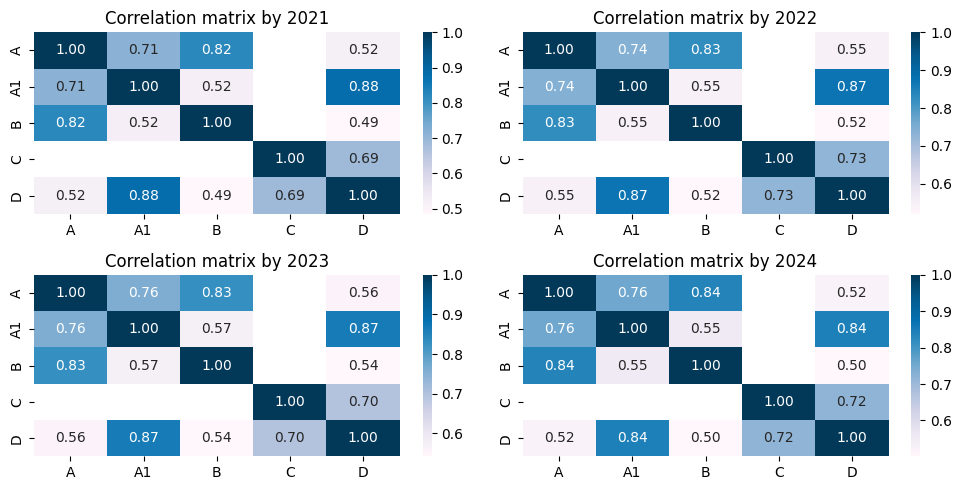

In [ ]:
# Danh sách các năm cần phân tích
years = [2021, 2022, 2023, 2024]

# Tạo ra 1 figure để chứa các heatmap
fig, axes = plt.subplots(2,2, figsize=(10,5))
axes = axes.flatten()

# Vẽ heatmap cho từng năm
for i, year in enumerate(years):
    # Lọc dữ liệu cho năm hiện tại
    df_year = df_data_map[df_data_map['year'] == year]
    group_scores = df_year[['A', 'A1', 'B', 'C', 'D']]
    correlation_matrix = group_scores.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt='.2f', ax=axes[i])
    axes[i].set_title(f'Correlation matrix by {year}')

# Điều chỉnh khoảng cách giữa các subplots
plt.subplots_adjust(wspace=0.5, hspace=0.6)
plt.tight_layout()
plt.show()

## **3.3 Location**

In [ ]:
# Dữ liệu đầy đủ của 63 tỉnh thành của Việt Nam
data_province = {
    'province': [
        'Hà Nội', 'Hải Phòng', 'Quảng Ninh', 'Vĩnh Phúc', 'Bắc Ninh',
        'Hải Dương', 'Hưng Yên', 'Hà Nam', 'Thái Bình','Nam Định',
        'Ninh Bình', 'Hà Giang', 'Cao Bằng', 'Bắc Kạn', 'Tuyên Quang',
        'Lào Cai', 'Điện Biên', 'Lai Châu', 'Sơn La', 'Yên Bái',
        'Hòa Bình', 'Thái Nguyên', 'Lạng Sơn', 'Bắc Giang', 'Phú Thọ',
        'Quảng Bình', 'Quảng Trị', 'Thừa Thiên Huế', 'Đà Nẵng', 'Quảng Nam',
        'Quảng Ngãi', 'Bình Định', 'Phú Yên', 'Khánh Hòa', 'Ninh Thuận',
        'Bình Thuận', 'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 'Gia Lai',
        'Kon Tum', 'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng', 'Bình Phước',
        'Tây Ninh', 'Bình Dương', 'Đồng Nai', 'Bà Rịa - Vũng Tàu', 'TP. Hồ Chí Minh',
        'Long An', 'Tiền Giang', 'Bến Tre', 'Trà Vinh', 'Vĩnh Long',
        'Đồng Tháp', 'An Giang', 'Kiên Giang', 'Cần Thơ', 'Hậu Giang',
        'Sóc Trăng', 'Bạc Liêu', 'Cà Mau'],
    'region': [
        'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng',
        'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng',
        'Đồng bằng sông Hồng', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc',
        'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc',
        'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc',
        'Bắc Trung Bộ', 'Bắc Trung Bộ', 'Bắc Trung Bộ', 'Duyên hải Nam Trung Bộ', 'Duyên hải Nam Trung Bộ',
        'Duyên hải Nam Trung Bộ', 'Duyên hải Nam Trung Bộ', 'Duyên hải Nam Trung Bộ', 'Duyên hải Nam Trung Bộ', 'Duyên hải Nam Trung Bộ',
        'Duyên hải Nam Trung Bộ', 'Bắc Trung Bộ', 'Bắc Trung Bộ', 'Bắc Trung Bộ', 'Tây Nguyên',
        'Tây Nguyên', 'Tây Nguyên', 'Tây Nguyên', 'Tây Nguyên', 'Đông Nam Bộ',
        'Đông Nam Bộ', 'Đông Nam Bộ', 'Đông Nam Bộ', 'Đông Nam Bộ', 'Đông Nam Bộ',
        'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long',
        'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long',
        'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long'
    ]
}

# Tạo DataFrame
data_eco_region = pd.DataFrame(data_province)

In [ ]:
df_data_map_region = pd.merge(df_data_map, data_eco_region, on='province', how='left')

In [ ]:
df_data_map_region[df_data_map_region['code'] == '31'].head(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year,province_code,code,province,A,A1,B,C,D,region
191053,31000020,6.4,4.75,2.2,3.75,4.25,4.25,NaN,NaN,NaN,none,2020,31,31,Quảng Bình,14.4,12.35,14.9,NaN,13.35,NaN
191054,31000023,4.6,3.00,NaN,NaN,NaN,NaN,2.50,NaN,NaN,none,2020,31,31,Quảng Bình,NaN,NaN,NaN,NaN,NaN,NaN
191055,31000038,1.6,3.50,NaN,NaN,NaN,NaN,2.25,5.25,NaN,none,2020,31,31,Quảng Bình,NaN,NaN,NaN,11.00,NaN,NaN
191056,31000007,2.0,7.00,1.8,NaN,NaN,NaN,5.00,5.75,8.25,none,2020,31,31,Quảng Bình,NaN,NaN,NaN,17.75,10.80,NaN
191057,31000001,3.6,5.50,3.2,NaN,NaN,NaN,4.00,7.00,7.75,none,2020,31,31,Quảng Bình,NaN,NaN,NaN,16.50,12.30,NaN


In [ ]:
# Thống kê theo tỉnh
df_year_group_region = (
      df_data_map_region
      .pivot_table(index='region', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

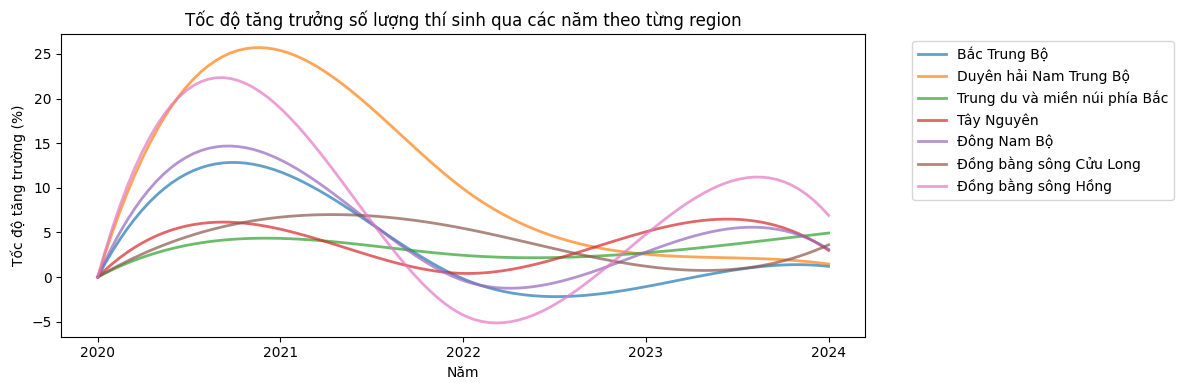

In [ ]:
# Tính toán số lượng thí sinh mỗi năm theo region
students_per_year_region = df_data_map_region.groupby(['year','region']).size().unstack()

# Tính toán tốc độ tăng trưởng
growth_rate_region = students_per_year_region.pct_change() * 100

# Xử lý các giá trị inf và nan
growth_rate_region.replace([np.inf, -np.inf], np.nan, inplace=True)
growth_rate_region.fillna(0, inplace=True)

# Vẽ biểu đồ đường cho tốc độ tăng trưởng theo từng region
plt.figure(figsize=(12,4))

for region in growth_rate_region.columns:
    x = growth_rate_region.index
    y = growth_rate_region[region]

    # Tạo các điểm x mới để làm mịn đường
    x_new = np.linspace(x.min(), x.max(), 100)

    # Tạo spline để làm mịn đường
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_new)

    plt.plot(x_new, y_smooth, label=region, lw=2, alpha=0.7)

plt.title('Tốc độ tăng trưởng số lượng thí sinh qua các năm theo từng region')
plt.xlabel('Năm')
plt.ylabel('Tốc độ tăng trường (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(False)
plt.xticks(x_year)
plt.tight_layout()
plt.show()

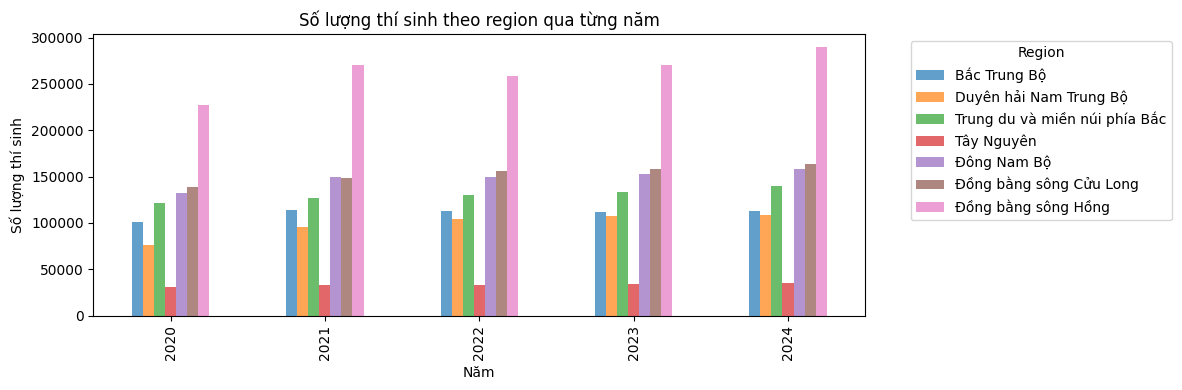

In [ ]:
# Tính toán số lượng thí sinh các năm theo từng region
students_per_year_region = df_data_map_region.groupby(['year','region']).size().unstack()

# Vẽ biểu đồ cột so sánh số lượng thí sinh theo region qua từng năm
students_per_year_region.plot(kind='bar', figsize=(12, 4), alpha=0.7)
plt.title('Số lượng thí sinh theo region qua từng năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Bắc Trung Bộ**

In [ ]:
# Check BTB
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Bắc Trung Bộ']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_21'] = (
  (df_year_group_kv['2021'] - df_year_group_kv['2020']) / df_year_group_kv['2020']
)

df_year_group_kv['diff_22'] = (
  (df_year_group_kv['2022'] - df_year_group_kv['2021']) / df_year_group_kv['2021']
)

df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

In [ ]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2021', ascending=False).style.format({'diff_21': '{:.0%}', 'diff_22': '{:.0%}', 'diff_23': '{:.0%}', 'diff_24': '{:.0%}'})
.background_gradient(subset=['diff_21', 'diff_22', 'diff_23', 'diff_24'], cmap='PuBu')
)

year,province,2020,2021,2022,2023,2024,diff_21,diff_22,diff_23,diff_24
3,Thanh Hóa,34740,40085,37466,36480,38532,15%,-7%,-3%,6%
1,Nghệ An,31072,34327,36564,36886,36729,10%,7%,1%,-0%
0,Hà Tĩnh,15308,17285,17304,17249,17004,13%,0%,-0%,-1%
4,Thừa Thiên Huế,12514,13311,13296,13029,12774,6%,-0%,-2%,-2%
2,Quảng Trị,7897,8485,8643,8413,8359,7%,2%,-3%,-1%


### **Duyên Hải NTB**

In [ ]:
# Check NTB
# Thống kê theo tỉnh
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Duyên hải Nam Trung Bộ']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_21'] = (
  (df_year_group_kv['2021'] - df_year_group_kv['2020']) / df_year_group_kv['2020']
)

df_year_group_kv['diff_22'] = (
  (df_year_group_kv['2022'] - df_year_group_kv['2021']) / df_year_group_kv['2021']
)

df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

In [ ]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2021', ascending=False).style.format({'diff_21': '{:.0%}', 'diff_22': '{:.0%}', 'diff_23': '{:.0%}', 'diff_24': '{:.0%}'})
.background_gradient(subset=['diff_21', 'diff_22', 'diff_23', 'diff_24'], cmap='PuBu')
)

year,province,2020,2021,2022,2023,2024,diff_21,diff_22,diff_23,diff_24
5,Quảng Nam,7280.000000,16727.000000,16739.000000,17197.000000,17292.000000,130%,0%,3%,1%
1,Bình Định,16876.000000,15428.000000,18489.000000,18897.000000,19342.000000,-9%,20%,2%,2%
2,Khánh Hòa,13094.000000,13858.000000,14025.000000,14487.000000,14388.000000,6%,1%,3%,-1%
7,Đà Nẵng,nan,12637.000000,12575.000000,13133.000000,13414.000000,nan%,-0%,4%,2%
0,Bình Thuận,10893.000000,12043.000000,12727.000000,12900.000000,13133.000000,11%,6%,1%,2%
4,Phú Yên,10078.000000,9500.000000,10874.000000,10666.000000,10622.000000,-6%,14%,-2%,-0%
6,Quảng Ngãi,11966.000000,9002.000000,13295.000000,13870.000000,14354.000000,-25%,48%,4%,3%
3,Ninh Thuận,5717.000000,5976.000000,5875.000000,6121.000000,6288.000000,5%,-2%,4%,3%


### **Trung du và miền núi phía Bắc**

In [ ]:
# Check TDMNPB
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Trung du và miền núi phía Bắc']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_21'] = (
  (df_year_group_kv['2021'] - df_year_group_kv['2020']) / df_year_group_kv['2020']
)

df_year_group_kv['diff_22'] = (
  (df_year_group_kv['2022'] - df_year_group_kv['2021']) / df_year_group_kv['2021']
)

df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

In [ ]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2021', ascending=False).style.format({'diff_21': '{:.0%}', 'diff_22': '{:.0%}', 'diff_23': '{:.0%}', 'diff_24': '{:.0%}'})
.background_gradient(subset=['diff_21', 'diff_22', 'diff_23', 'diff_24'], cmap='PuBu')
)

year,province,2020,2021,2022,2023,2024,diff_21,diff_22,diff_23,diff_24
0,Bắc Giang,19298,17938,20553,21080,21755,-7%,15%,3%,3%
8,Phú Thọ,13810,16165,15808,15874,16382,17%,-2%,0%,3%
10,Thái Nguyên,15190,14845,15083,16153,16713,-2%,2%,7%,3%
9,Sơn La,11626,11384,11325,11773,12584,-2%,-1%,4%,7%
7,Lạng Sơn,8510,9539,9608,9353,9469,12%,1%,-3%,1%
4,Hòa Bình,9151,9489,9575,9690,9823,4%,1%,1%,1%
11,Tuyên Quang,7995,8688,8425,8392,8984,9%,-3%,-0%,7%
12,Yên Bái,7404,8088,8048,8235,8687,9%,-0%,2%,5%
6,Lào Cai,6355,7337,7204,7866,8356,15%,-2%,9%,6%
13,Điện Biên,5608,6276,6413,6685,7216,12%,2%,4%,8%


### **Tây Nguyên**

In [ ]:
# Check TN
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Tây Nguyên']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_21'] = (
  (df_year_group_kv['2021'] - df_year_group_kv['2020']) / df_year_group_kv['2020']
)

df_year_group_kv['diff_22'] = (
  (df_year_group_kv['2022'] - df_year_group_kv['2021']) / df_year_group_kv['2021']
)

df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

In [ ]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2021', ascending=False).style.format({'diff_21': '{:.0%}', 'diff_22': '{:.0%}', 'diff_23': '{:.0%}', 'diff_24': '{:.0%}'})
.background_gradient(subset=['diff_21', 'diff_22', 'diff_23', 'diff_24'], cmap='PuBu')
)

year,province,2020,2021,2022,2023,2024,diff_21,diff_22,diff_23,diff_24
2,Lâm Đồng,13497,14183,14102,14687,15372,5%,-1%,4%,5%
0,Gia Lai,13315,13953,14075,14861,15201,5%,1%,6%,2%
1,Kon Tum,4294,4638,4730,5028,5038,8%,2%,6%,0%


### **Đông Nam Bộ**

In [ ]:
# Check ĐNB
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Đông Nam Bộ']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_21'] = (
  (df_year_group_kv['2021'] - df_year_group_kv['2020']) / df_year_group_kv['2020']
)

df_year_group_kv['diff_22'] = (
  (df_year_group_kv['2022'] - df_year_group_kv['2021']) / df_year_group_kv['2021']
)

df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

In [ ]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2021', ascending=False).style.format({'diff_21': '{:.0%}', 'diff_22': '{:.0%}', 'diff_23': '{:.0%}', 'diff_24': '{:.0%}'})
.background_gradient(subset=['diff_21', 'diff_22', 'diff_23', 'diff_24'], cmap='PuBu')
)

year,province,2020,2021,2022,2023,2024,diff_21,diff_22,diff_23,diff_24
2,TP. Hồ Chí Minh,74451,86367,84596,84851,87322,16%,-2%,0%,3%
4,Đồng Nai,28254,30390,31363,33158,33800,8%,3%,6%,2%
0,Bình Dương,11386,13015,12797,14218,15239,14%,-2%,11%,7%
1,Bình Phước,9774,10372,10702,10930,11304,6%,3%,2%,3%
3,Tây Ninh,8544,9656,9763,10229,10486,13%,1%,5%,3%


### **ĐB Sông Hồng**

In [ ]:
# Check ĐBSH
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Đồng bằng sông Hồng']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_21'] = (
  (df_year_group_kv['2021'] - df_year_group_kv['2020']) / df_year_group_kv['2020']
)

df_year_group_kv['diff_22'] = (
  (df_year_group_kv['2022'] - df_year_group_kv['2021']) / df_year_group_kv['2021']
)

df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

In [ ]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2021', ascending=False).style.format({'diff_21': '{:.0%}', 'diff_22': '{:.0%}', 'diff_23': '{:.0%}', 'diff_24': '{:.0%}'})
.background_gradient(subset=['diff_21', 'diff_22', 'diff_23', 'diff_24'], cmap='PuBu')
)

year,province,2020,2021,2022,2023,2024,diff_21,diff_22,diff_23,diff_24
2,Hà Nội,78860,100838,96942,102095,107867,28%,-4%,5%,6%
5,Hải Phòng,18533,23269,22399,22723,25530,26%,-4%,1%,12%
9,Thái Bình,19592,22880,20145,20845,22580,17%,-12%,3%,8%
4,Hải Dương,19583,22293,20422,21934,23366,14%,-8%,7%,7%
6,Nam Định,18667,20953,19769,20405,21760,12%,-6%,3%,7%
8,Quảng Ninh,14547,16393,15624,16025,17848,13%,-5%,3%,11%
0,Bắc Ninh,14621,16355,15850,16724,17614,12%,-3%,6%,5%
10,Vĩnh Phúc,12171,14023,13873,14042,15461,15%,-1%,1%,10%
3,Hưng Yên,12780,12357,13885,15386,16329,-3%,12%,11%,6%
7,Ninh Bình,9219,11063,10501,11149,11749,20%,-5%,6%,5%


### **ĐB Sông Cửu Long**

In [ ]:
# Check ĐBSCL
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Đồng bằng sông Cửu Long']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_21'] = (
  (df_year_group_kv['2021'] - df_year_group_kv['2020']) / df_year_group_kv['2020']
)

df_year_group_kv['diff_22'] = (
  (df_year_group_kv['2022'] - df_year_group_kv['2021']) / df_year_group_kv['2021']
)

df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

In [ ]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2021', ascending=False).style.format({'diff_21': '{:.0%}', 'diff_22': '{:.0%}', 'diff_23': '{:.0%}', 'diff_24': '{:.0%}'})
.background_gradient(subset=['diff_21', 'diff_22', 'diff_23', 'diff_24'], cmap='PuBu')
)

year,province,2020,2021,2022,2023,2024,diff_21,diff_22,diff_23,diff_24
7,Long An,13850,16375,15321,15653,15771,18%,-6%,2%,1%
9,Tiền Giang,14283,16198,15028,15455,16273,13%,-7%,3%,5%
6,Kiên Giang,12434,13711,14325,14423,15035,10%,4%,1%,4%
2,Bến Tre,11313,13200,12301,12117,12145,17%,-7%,-1%,0%
0,An Giang,15239,12120,18574,19942,20251,-20%,53%,7%,2%
4,Cần Thơ,10648,12120,12195,12061,12841,14%,1%,-1%,6%
11,Vĩnh Long,10215,11343,10327,10435,10913,11%,-9%,1%,5%
3,Cà Mau,9637,10925,10692,9776,10151,13%,-2%,-9%,4%
12,Đồng Tháp,13386,10531,15038,15678,16464,-21%,43%,4%,5%
8,Sóc Trăng,8514,9632,9985,10045,10642,13%,4%,1%,6%
